## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
# warnings.filterwarnings("ignore")

## 1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?


In [2]:
df = pd.read_csv("data\AirPassengers.csv")
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


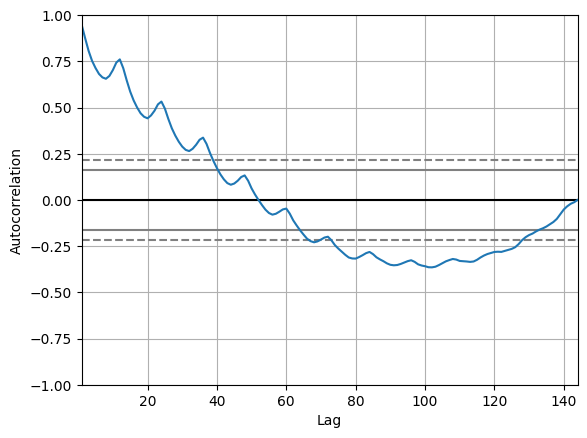

In [5]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df["value"].values);

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.

In [77]:
df

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
df_ma = df["value"].rolling(100, min_periods=1).mean() 
df_ma

0      112.000000
1      115.000000
2      120.666667
3      122.750000
4      122.400000
          ...    
139    326.090000
140    329.340000
141    331.770000
142    333.370000
143    335.270000
Name: value, Length: 144, dtype: float64

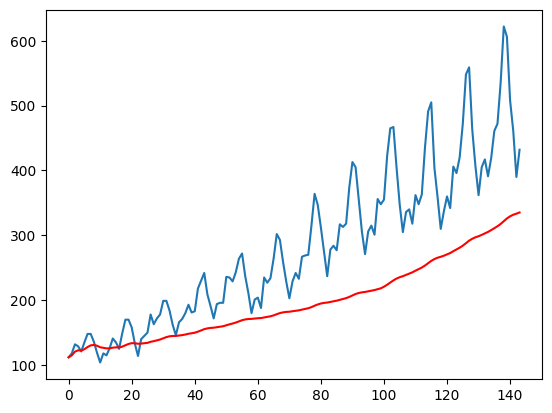

In [10]:
plt.plot(df["value"])
plt.plot(df_ma,color='red')

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
result = adfuller(df['value'].values)
result[1]

0.991880243437641

## 4. Aplica una transformación logarítmica

In [ ]:
# hacemos transformación logarítmica cuando la gráfica está muy escorada hacia la izq o la dcha
df_log = np.log(df)
df_log

<AxesSubplot:xlabel='date'>

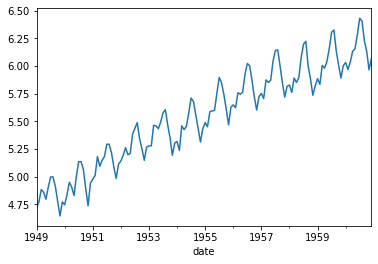

In [92]:
plt.plot(df_log)

## 5. Divide en train y test. Guarda 20 muestras para test.

In [22]:
# shapes de train y test


(124,)
(20,)


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=20, random_state=42)

train.shape
test.shape

## 6. Crea tu primer modelo ARIMA

In [17]:
pip install pmdarima

   ---------------------------------------- 0.0/613.3 kB ? eta -:--:--
    --------------------------------------- 10.2/613.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/613.3 kB 217.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/613.3 kB 281.8 kB/s eta 0:00:03
   ------ ------------------------------- 102.4/613.3 kB 492.8 kB/s eta 0:00:02
   ---------- --------------------------- 163.8/613.3 kB 614.4 kB/s eta 0:00:01
   --------------- ---------------------- 245.8/613.3 kB 754.9 kB/s eta 0:00:01
   ------------------- ------------------ 317.4/613.3 kB 787.7 kB/s eta 0:00:01
   ------------------------ ------------- 399.4/613.3 kB 859.0 kB/s eta 0:00:01
   --------------------------- ---------- 450.6/613.3 kB 880.6 kB/s eta 0:00:01
   ------------------------------- ------ 512.0/613.3 kB 892.8 kB/s eta 0:00:01
   ----------------------------------- -- 573.4/613.3 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- 613.3/613.3 kB 

In [18]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
# módelo con art_p=1, start_q=1, max_d=3, max_p=5, max_q=5 y stationary=False

model = auto_arima(train,
                   start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    stationary=False,
                    trace=True,
                    stepwise=True)

print(model.aic())

In [84]:
# predice 20 valores
model = ARIMA(order=(0,1,1))
model.fit(train)
predictions = model.predict(20)
predictions


array([396.80138345, 395.79112516, 369.52313598, 387.27007933,
       364.88245741, 381.961082  , 378.29898929, 376.23006892,
       389.42713079, 372.28691084, 389.13738288, 375.00996104,
       381.30256629, 382.37160442, 374.22919603, 387.11052311,
       373.41134741, 385.05707763, 378.37808096, 378.93797036])

In [31]:
# test.values
test.values

array([6.04025471, 6.15697899, 6.30627529, 6.32614947, 6.13772705,
       6.00881319, 5.89164421, 6.00388707, 6.03308622, 5.96870756,
       6.03787092, 6.13339804, 6.15697899, 6.28226675, 6.43294009,
       6.40687999, 6.23048145, 6.13339804, 5.96614674, 6.06842559])

In [66]:
# MAE test
# MAPE test
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse = mean_squared_error(test, predictions)
print("mean_squared_error:", mse)

# Calcular el MAE
mae = mean_absolute_error(test, predictions)
print("MAE:", mae)

# Calcular el MAPE (MAPE se calcula manualmente)
mape = np.mean(np.abs((test - predictions) / test)) * 100
print("MAPE:", mape)

MAE 0.12657252410066783
MAPE 0.020640169700076615


In [95]:
# reentrena el módelo incluyendo el argumento m=12

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [96]:
# vuelve a predecir 20 valores y obtén MAE test y MAPE test

# compara con los valores previos

MAE 0.02702695363004102
MAPE 0.004412233526458519


## 7. Representa en una gráfica los datos de test y tus predicciones.

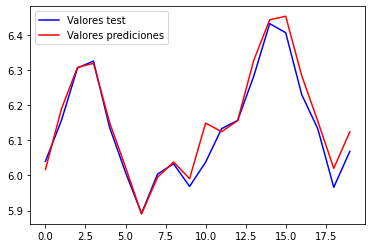

## 8. Prueba otros modelos, a ver qué performance presentan.

In [98]:
# Transforma el df para poder usarlo con otros módelos

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1950-01-01,4.744932,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.836282,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.948760,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.905275,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.828314,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,6.406880,6.326149,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940
1960-09-01,6.230481,6.137727,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880
1960-10-01,6.133398,6.008813,5.891644,6.003887,6.033086,5.968708,6.037871,6.133398,6.156979,6.282267,6.432940,6.406880,6.230481


In [ ]:
# Divide en X e y, en train/test y muestra los shapes obtenidos

(112, 12)
(20, 12)
(112,)
(20,)


In [107]:
X_test

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,
1959-05-01,5.894403,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414
1959-06-01,6.075346,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255
1959-07-01,6.196444,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979
1959-08-01,6.224558,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275
1959-09-01,6.001415,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149
1959-10-01,5.883322,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727
1959-11-01,5.736572,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727,6.008813
1959-12-01,5.820083,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727,6.008813,5.891644
1960-01-01,5.886104,5.834811,6.006353,5.981414,6.040255,6.156979,6.306275,6.326149,6.137727,6.008813,5.891644,6.003887


In [106]:
y_test

date
1959-05-01    6.040255
1959-06-01    6.156979
1959-07-01    6.306275
1959-08-01    6.326149
1959-09-01    6.137727
1959-10-01    6.008813
1959-11-01    5.891644
1959-12-01    6.003887
1960-01-01    6.033086
1960-02-01    5.968708
1960-03-01    6.037871
1960-04-01    6.133398
1960-05-01    6.156979
1960-06-01    6.282267
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: value, dtype: float64

In [102]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
# entrena el random forest

# muestra el mean_absolute_percentage_error de test

0.013769863496171658

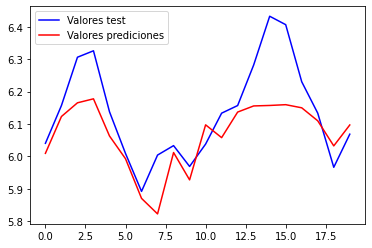

In [111]:
# feature_importances_

array([0.89574548, 0.01420781, 0.00129769, 0.00172738, 0.00228326,
       0.00155955, 0.00120087, 0.00176066, 0.00192478, 0.00514753,
       0.00241009, 0.07073491])

Prueba otro enfoque, esta vez que la fecha NO sea el índice

In [114]:
# Crea nuevas columnas con shifts de 1, 11, 12, 13

,date,value,t-1,t-11,t-12,t-13
0,1949-01-01,4.718499,NaN,NaN,NaN,NaN
1,1949-02-01,4.770685,4.718499,NaN,NaN,NaN
2,1949-03-01,4.882802,4.770685,NaN,NaN,NaN
3,1949-04-01,4.859812,4.882802,NaN,NaN,NaN
4,1949-05-01,4.795791,4.859812,NaN,NaN,NaN
...,...,...,...,...,...,...
139,1960-08-01,6.406880,6.432940,6.137727,6.326149,6.306275
140,1960-09-01,6.230481,6.406880,6.008813,6.137727,6.326149
141,1960-10-01,6.133398,6.230481,5.891644,6.008813,6.137727
142,1960-11-01,5.966147,6.133398,6.003887,5.891644,6.008813


In [120]:
# Divide en X e y, en train/test y muestra los shapes obtenidos

(112, 4)
(19, 4)
(112,)
(19,)


In [128]:
# entrena el random forest

# muestra el mean_absolute_percentage_error de test y train

0.01174169752011279
0.0035352065840446485


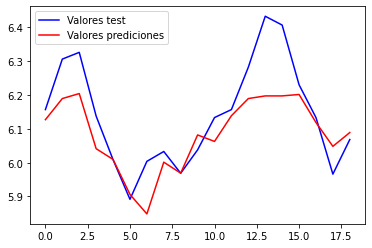